In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
# Коллекция оценок
def score_metrics(y_pred, y_true):
    print("ACCURACY: {}".format(accuracy_score(y_true, y_pred)))
    print("PRECISION: {}".format(precision_score(y_true, y_pred, labels=np.unique(y_true))))
    print("RECALL: {}".format(recall_score(y_true, y_pred, labels=np.unique(y_true))))
    print("CONFUSION MATRIX \n{}".format(confusion_matrix(y_true, y_pred)))

In [ ]:
# Считывание данных
path = "***" # Путь к директории с файлами
train_data = pd.read_csv(path + "/credit_train.csv")
additional = pd.read_csv(path + "/additional_credit_train_wo_target.csv")
test_data = pd.read_csv(path + "/credit_test.csv")
full_train_data = pd.concat([train_data, additional], ignore_index=True)

In [ ]:
train_data

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,52372,M,38,MAR,SPC,"12168,00",10,1.1,"0,308454",GRD,ОБЛ ВОЛОГОДСКАЯ,25000.0,0.0,0.0,0
1,75213,F,36,MAR,SPC,"17738,00",10,1.1,"0,498147",GRD,ОБЛ БЕЛГОРОДСКАЯ,25000.0,4.0,0.0,0
2,119931,M,23,UNM,SPC,"26489,00",10,1.1,"0,431980",SCH,ЧЕЛЯБИНСКАЯ ОБЛ,25000.0,NaN,NaN,0
3,134365,M,24,UNM,SPC,"20379,00",12,1.6,"0,770546",GRD,РЕСП КАРАЧАЕВО-ЧЕРКЕССКАЯ,50000.0,NaN,NaN,1
4,138695,F,47,MAR,SPC,"12019,00",10,1.6,"0,617275",SCH,УЛЬЯНОВСКАЯ ОБЛ,18000.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136591,167442,F,55,MAR,WRP,"34732,00",6,1.1,"0,328384",UGR,АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - Ю,35000.0,4.0,0.0,0
136592,134582,M,30,UNM,SPC,"22990,00",7,1.6,"0,278594",SCH,ОБЛ МОСКОВСКАЯ,30000.0,1.0,0.0,0
136593,170180,F,36,DIV,SPC,"18929,00",10,1.1,"0,425852",GRD,ОМСКАЯ ОБЛАСТЬ,25000.0,0.0,0.0,0
136594,59295,F,32,MAR,UMN,"15112,80",10,1.2,"0,419264",GRD,САНКТ-ПЕТЕРБУРГ,50000.0,5.0,0.0,0


In [ ]:
full_train_data[["credit_sum"]] = full_train_data[["credit_sum"]].apply(lambda x: x.str.replace(',','.')).astype(np.float64)
test_data[["credit_sum"]] = test_data[["credit_sum"]].apply(lambda x: x.str.replace(',','.')).astype(np.float64)
full_train_data[["score_shk"]] = full_train_data[["score_shk"]].apply(lambda x: x.str.replace(',','.')).astype(np.float64)
test_data[["score_shk"]] = test_data[["score_shk"]].apply(lambda x: x.str.replace(',','.')).astype(np.float64)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34150 entries, 0 to 34149
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   client_id             34150 non-null  int64  
 1   gender                34150 non-null  object 
 2   age                   34150 non-null  int64  
 3   marital_status        34150 non-null  object 
 4   job_position          34150 non-null  object 
 5   credit_sum            34150 non-null  float64
 6   credit_month          34150 non-null  int64  
 7   tariff_id             34150 non-null  float64
 8   score_shk             34150 non-null  float64
 9   education             34150 non-null  object 
 10  living_region         34112 non-null  object 
 11  monthly_income        34150 non-null  float64
 12  credit_count          32285 non-null  float64
 13  overdue_credit_count  32285 non-null  float64
dtypes: float64(6), int64(3), object(5)
memory usage: 3.6+ MB


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136596 entries, 0 to 136595
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             136596 non-null  int64  
 1   gender                136596 non-null  object 
 2   age                   136596 non-null  int64  
 3   marital_status        136596 non-null  object 
 4   job_position          136596 non-null  object 
 5   credit_sum            136596 non-null  object 
 6   credit_month          136596 non-null  int64  
 7   tariff_id             136596 non-null  float64
 8   score_shk             136596 non-null  object 
 9   education             136596 non-null  object 
 10  living_region         136442 non-null  object 
 11  monthly_income        136595 non-null  float64
 12  credit_count          129231 non-null  float64
 13  overdue_credit_count  129231 non-null  float64
 14  open_account_flg      136596 non-null  int64  
dtype

<BarContainer object of 2 artists>

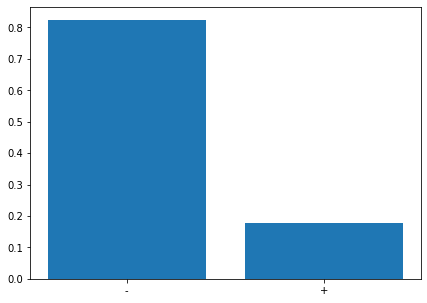

In [ ]:
# Очевидно, данные не сбалансированы 
plt.figure(figsize=(7, 5))
tmp = [train_data[train_data.open_account_flg == i].shape[0] / train_data.shape[0] for i in train_data.open_account_flg.unique()]
plt.bar(x=["-", "+"], height=tmp)

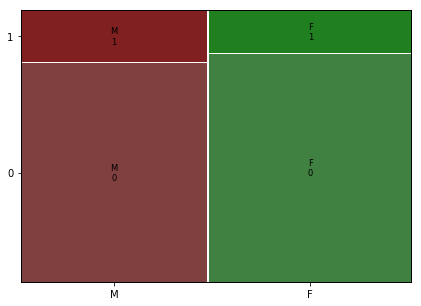

In [ ]:
# Относительно гендера целевая переменная ведёт себя +- одинаково.
fig,ax = plt.subplots(figsize=(7,5))
m = mosaic(train_data, ['gender', 'open_account_flg'], ax=ax)

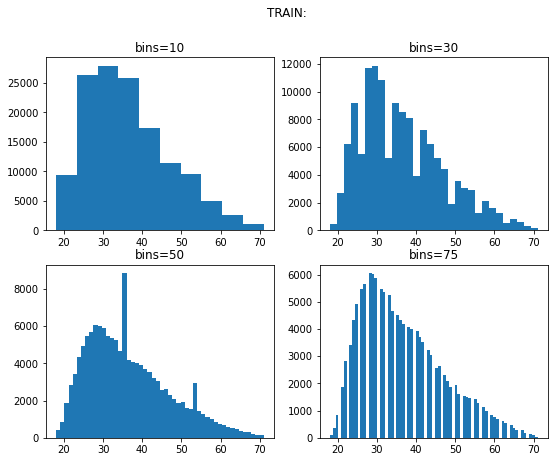

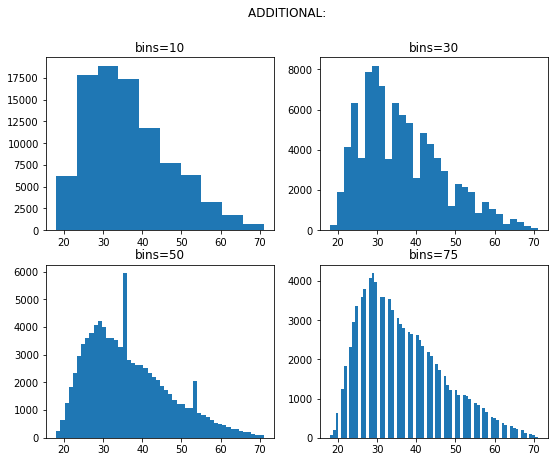

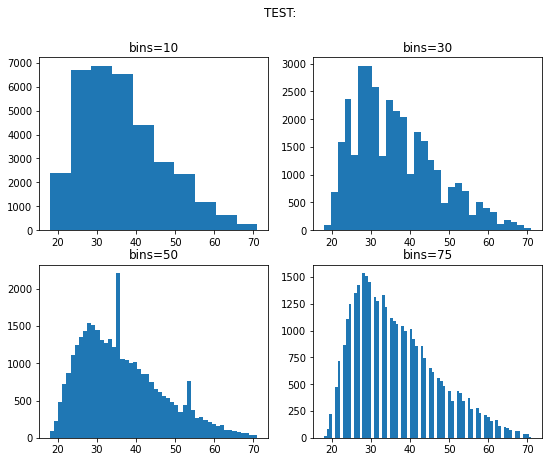

In [ ]:
# Возраст распределён +- равномерно с уходящим хвостом вправо.
# Можно будет попробовать заменить данный признак на категориальный
def plot_age_hist(d_type, age):
    fig, ax = plt.subplots(2, 2, figsize=(9, 7))
    fig.suptitle(d_type)
    ax[0, 0].hist(age, 10)
    ax[0, 0].set_title("bins=10")
    ax[0, 1].hist(age, 30)
    ax[0, 1].set_title("bins=30")
    ax[1, 0].hist(age, 50)
    ax[1, 0].set_title("bins=50")
    ax[1, 1].hist(age, 75)
    ax[1, 1].set_title("bins=75")
    plt.show()
for d_type, age in [("TRAIN: ", train_data.age.values), ("ADDITIONAL: ", additional.age.values), ("TEST: ", test_data.age.values)]:
    plot_age_hist(d_type, age)

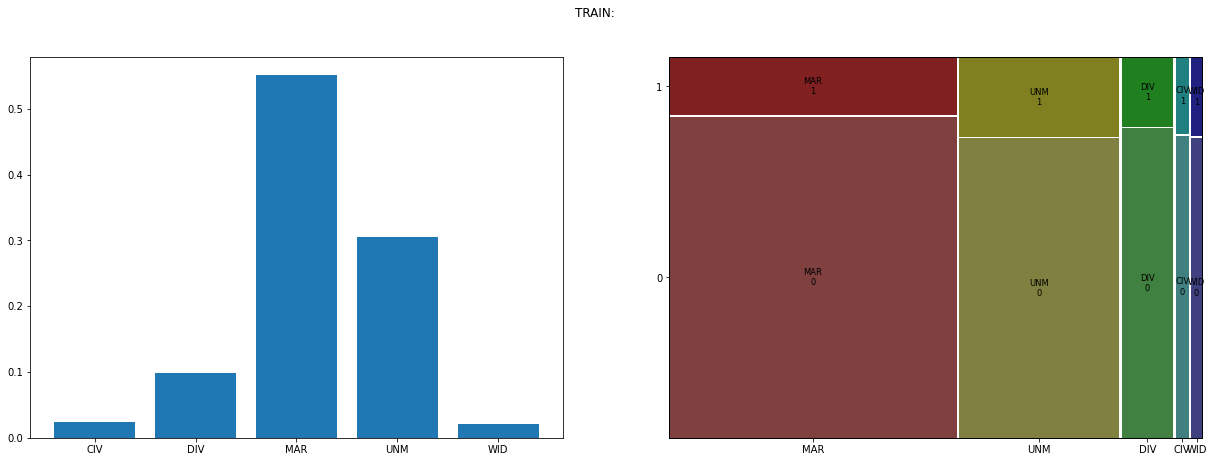

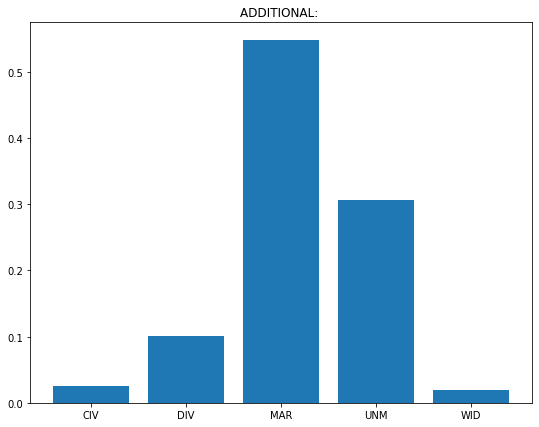

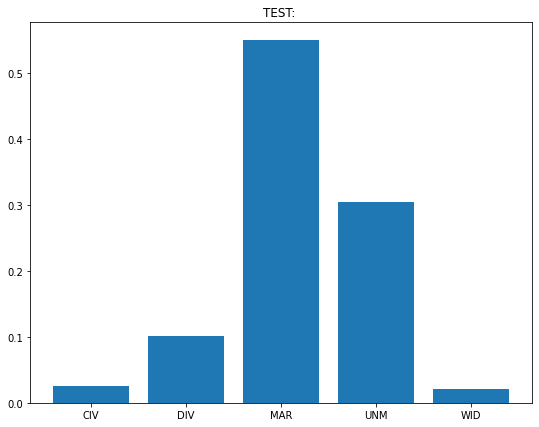

In [ ]:
# Видно преобладание одной из категорий, но относительно таргета, распределение +- одинаковое
def plot_mar_stat(d_type, marital_status):
    names = np.unique(marital_status.values[:, 0])
    s = marital_status.shape[0]
    tmp = [marital_status[marital_status.iloc[:, 0] == n].shape[0] / s for n in names]
    if d_type == "TRAIN: ":
        fig, axs = plt.subplots(1, 2, figsize=(21, 7), squeeze=False)
        fig.suptitle(d_type)
        axs[0, 0].bar(names, tmp, width=0.4)
        m = mosaic(marital_status, ["marital_status", "open_account_flg"], ax=axs[0,1])
    else:
        plt.figure(figsize=(9, 7))
        plt.bar(names, tmp, width=0.4)
        plt.title("{}".format(d_type))

tmp = [("TRAIN: ", train_data[["marital_status", "open_account_flg"]]), ("ADDITIONAL: ", additional[["marital_status"]]), ("TEST: ", test_data[["marital_status"]])]
for d_type, m_stat in tmp:
    plot_mar_stat(d_type, m_stat)

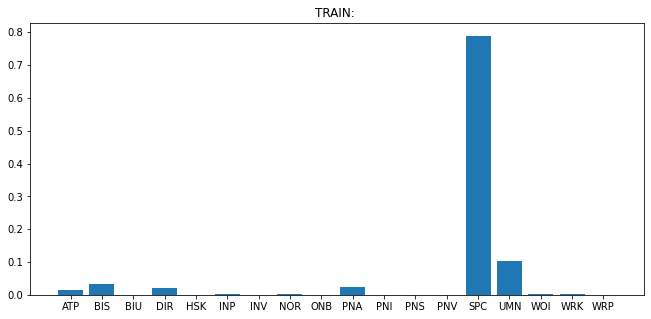

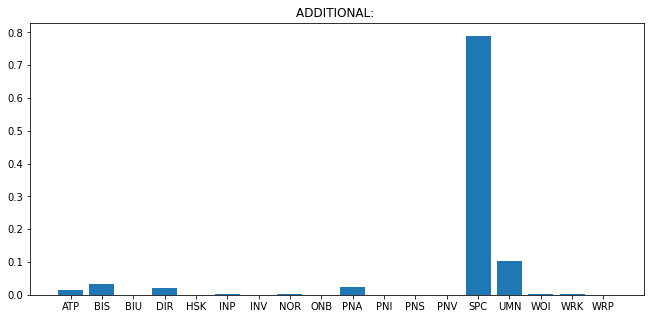

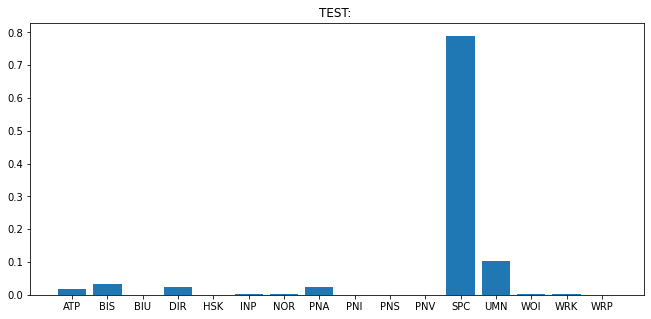

In [ ]:
# Исходя из графиков, есть ощущение, что фича будет мешать, но в случае недообучаемости, можно будет придумать что нибудь(объединить значения или что-то такое)
def plot_job_pos(d_type, job):
    names = np.unique(job.values[:, 0])
    s = job.shape[0]
    tmp = [job[job.iloc[:, 0] == n].shape[0] / s for n in names]
    plt.figure(figsize=(11, 5))
    plt.bar(names, tmp)
    plt.title("{}".format(d_type))

tmp = [("TRAIN: ", train_data[["job_position", "open_account_flg"]]), ("ADDITIONAL: ", additional[["job_position"]]), ("TEST: ", test_data[["job_position"]])]
for d_type, job in tmp:
    plot_job_pos(d_type, job)

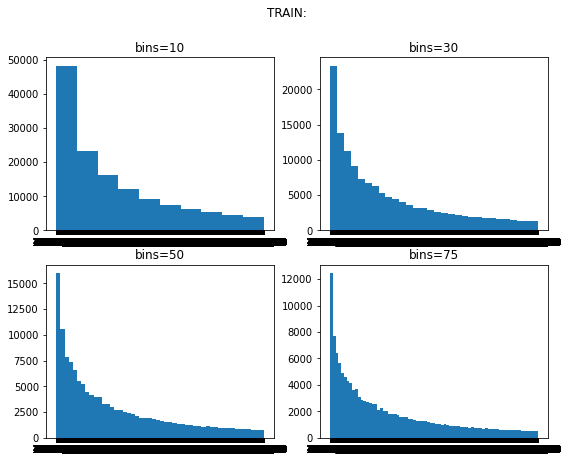

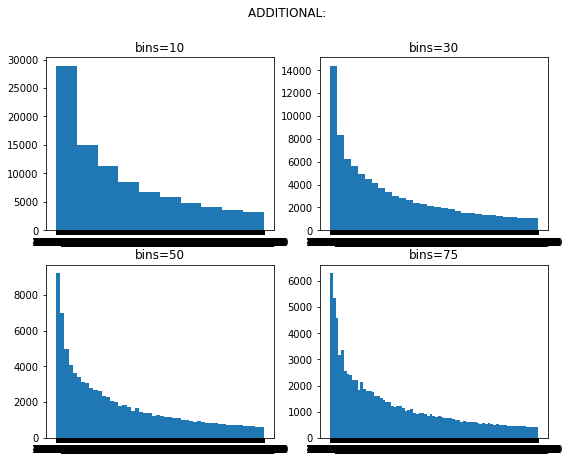

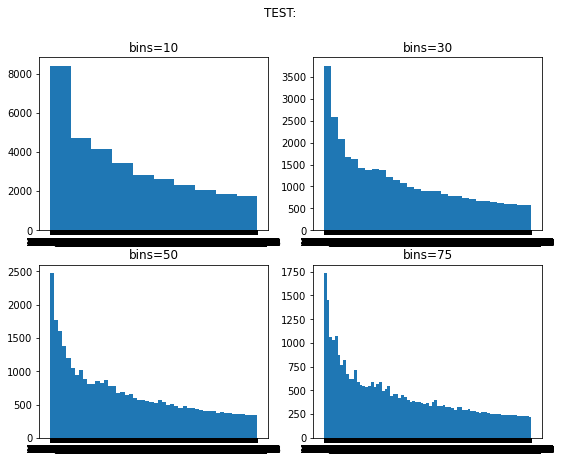

In [ ]:
 # Возраст распределён +- равномерно с уходящим хвостом вправо.
# Можно будет попробовать заменить данный признак на категориальный
def plot_cred_hist(d_type, cred):
    fig, ax = plt.subplots(2, 2, figsize=(9, 7))
    fig.suptitle(d_type)
    ax[0, 0].hist(cred, 10)
    ax[0, 0].set_title("bins=10")
    ax[0, 1].hist(cred, 30)
    ax[0, 1].set_title("bins=30")
    ax[1, 0].hist(cred, 50)
    ax[1, 0].set_title("bins=50")
    ax[1, 1].hist(cred, 75)
    ax[1, 1].set_title("bins=75")
    plt.show()
for d_type, credit_sum in [("TRAIN: ", train_data.credit_sum.values), ("ADDITIONAL: ", additional.credit_sum.values), ("TEST: ", test_data.credit_sum.values)]:
    plot_cred_hist(d_type, credit_sum)

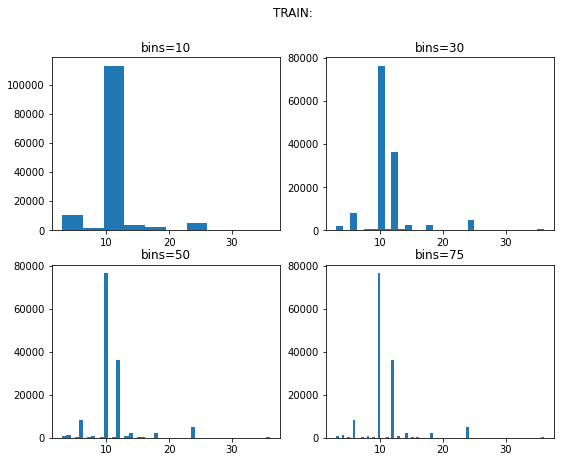

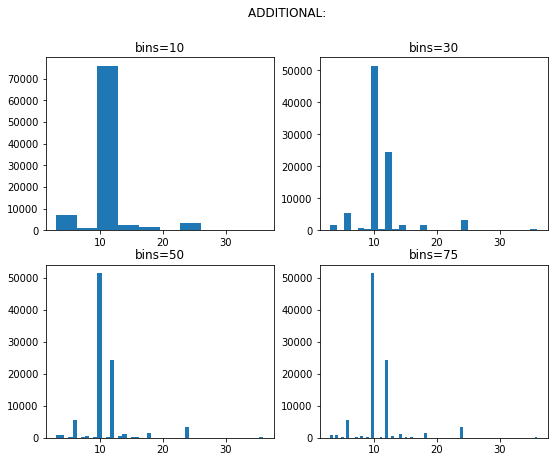

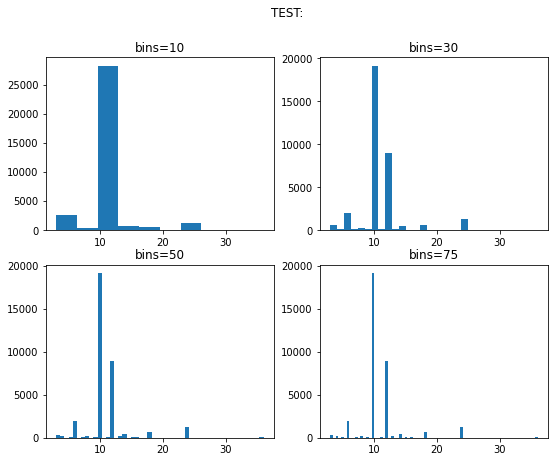

In [ ]:
# Исходя из графиков, лучше перейти к категориям
def plot_cred_month_hist(d_type, cred_month):
    fig, ax = plt.subplots(2, 2, figsize=(9, 7))
    fig.suptitle(d_type)
    ax[0, 0].hist(cred_month, 10)
    ax[0, 0].set_title("bins=10")
    ax[0, 1].hist(cred_month, 30)
    ax[0, 1].set_title("bins=30")
    ax[1, 0].hist(cred_month, 50)
    ax[1, 0].set_title("bins=50")
    ax[1, 1].hist(cred_month, 75)
    ax[1, 1].set_title("bins=75")
    plt.show()
for d_type, credit_month in [("TRAIN: ", train_data.credit_month.values), ("ADDITIONAL: ", additional.credit_month.values), ("TEST: ", test_data.credit_month.values)]:
    plot_cred_hist(d_type, credit_month)

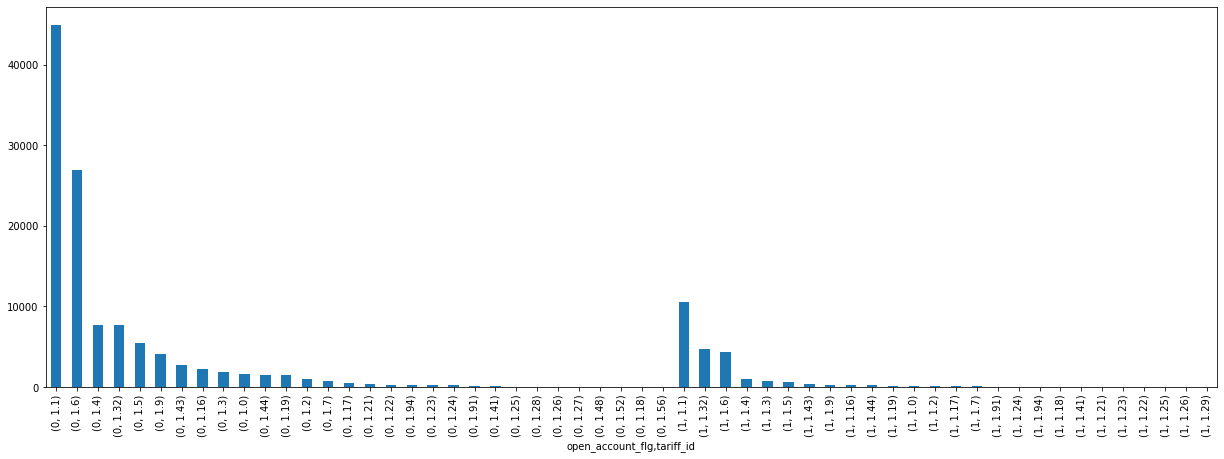

In [ ]:
# Со всеми категориальными признаками можно поработать относительно долей после группировки относительно таргета!!!
fig, ax = plt.subplots(figsize=(21, 7))
train_data.groupby(by='open_account_flg').tariff_id.value_counts().plot.bar(ax=ax)

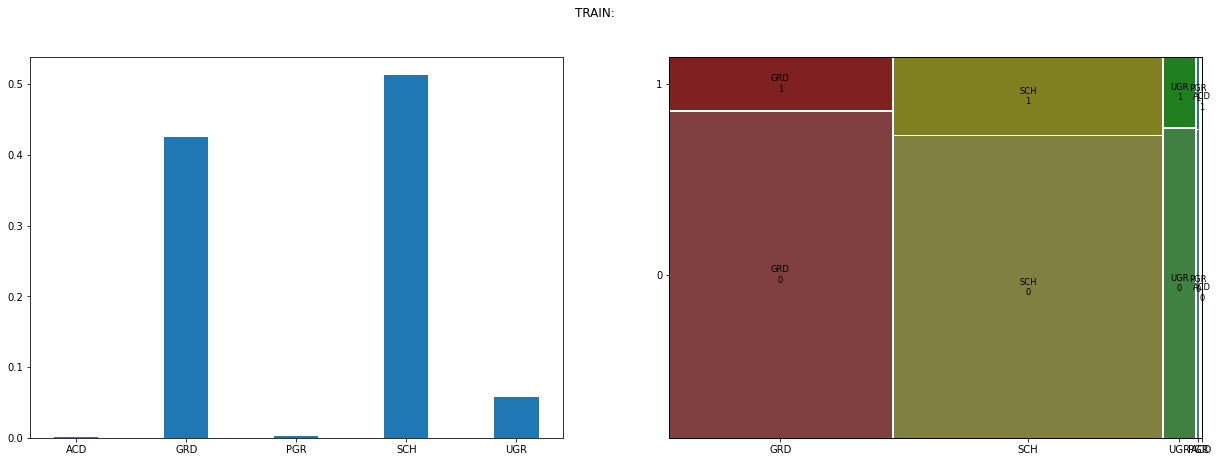

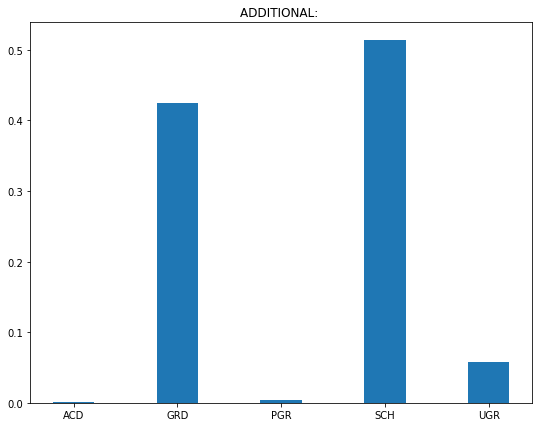

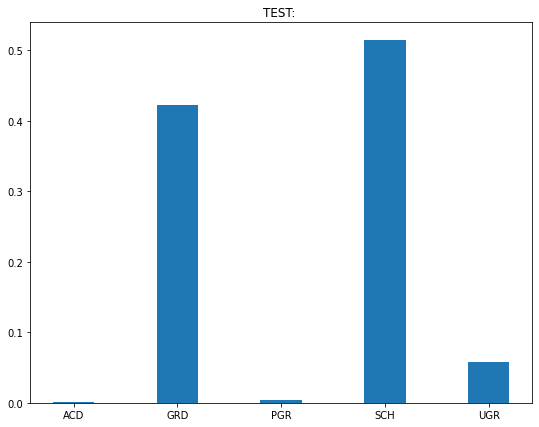

In [ ]:
# Видно преобладание одной из категорий, но относительно таргета, распределение +- одинаковое
def plot_education(d_type, education):
    names = np.unique(education.values[:, 0])
    s = education.shape[0]
    tmp = [education[education.iloc[:, 0] == n].shape[0] / s for n in names]
    if d_type == "TRAIN: ":
        fig, axs = plt.subplots(1, 2, figsize=(21, 7), squeeze=False)
        fig.suptitle(d_type)
        axs[0, 0].bar(names, tmp, width=0.4)
        m = mosaic(education, ["education", "open_account_flg"], ax=axs[0,1])
    else:
        plt.figure(figsize=(9, 7))
        plt.bar(names, tmp, width=0.4)
        plt.title("{}".format(d_type))

tmp = [("TRAIN: ", train_data[["education", "open_account_flg"]]), ("ADDITIONAL: ", additional[["education"]]), ("TEST: ", test_data[["education"]])]
for d_type, edu in tmp:
    plot_education(d_type, edu)

In [ ]:
# Регионы можно было бы перегруппировать по областям, посмотреть что это даст
train_data.living_region.value_counts()

ОБЛ МОСКОВСКАЯ        9792
КРАСНОДАРСКИЙ КРАЙ    5897
САНКТ-ПЕТЕРБУРГ       4535
МОСКВА                4350
ТАТАРСТАН РЕСП        4157
                      ... 
БРЯНСКИЙ                 1
ОБЛ.МОСКОВСКАЯ           1
СВЕРДЛОВСКАЯ             1
Г.МОСКВА                 1
ПЕРМСКИЙ                 1
Name: living_region, Length: 293, dtype: int64

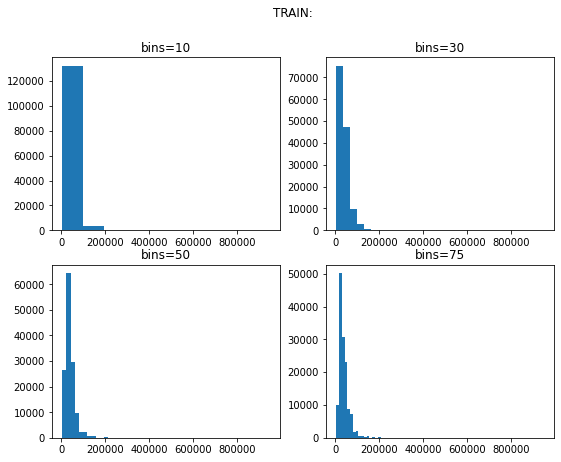

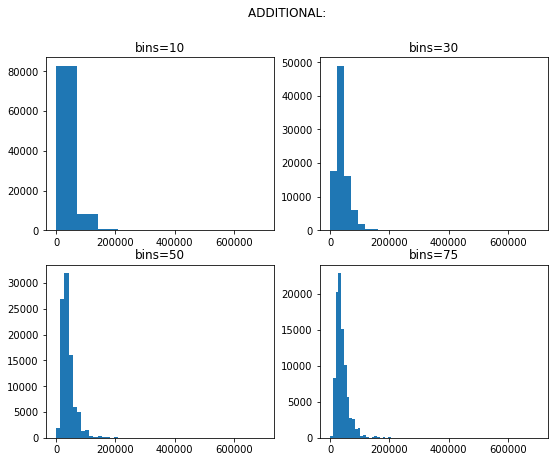

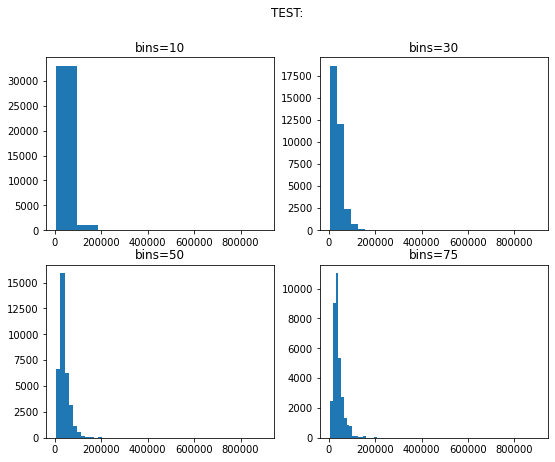

In [ ]:
# ЗП распределена +- равномерно с уходящим хвостом вправо.
# Можно будет попробовать заменить данный признак на категориальный, в случае NaN значения можно устанавливать:
# 1)Среднее/Медиану - относительно распределения
# 2)Мин - если думать, что человек не работает, поэтому и нет данных
# 3)Высчитывать относительно других категориальных признаков(например gender)
def plot_m_income_hist(d_type, m_income):
    fig, ax = plt.subplots(2, 2, figsize=(11, 9))
    fig.suptitle(d_type)
    ax[0, 0].hist(m_income, 10)
    ax[0, 0].set_title("bins=10")
    ax[0, 1].hist(m_income, 30)
    ax[0, 1].set_title("bins=30")
    ax[1, 0].hist(m_income, 50)
    ax[1, 0].set_title("bins=50")
    ax[1, 1].hist(m_income, 75)
    ax[1, 1].set_title("bins=75")
    plt.show()
for d_type, m_income in [("TRAIN: ", train_data.monthly_income.values), ("ADDITIONAL: ", additional.monthly_income.values), ("TEST: ", test_data.monthly_income.values)]:
    plot_age_hist(d_type, m_income)

In [ ]:
# Можно попробовать превратить в категориальный признак. Заполнять "NaN" аналогично, как и выше
train_data.credit_count.value_counts()

1.0     36170
2.0     29538
0.0     20720
3.0     19198
4.0     11329
5.0      5995
6.0      3110
7.0      1604
8.0       789
9.0       384
10.0      169
11.0       97
12.0       64
13.0       28
14.0       12
15.0       10
17.0        5
16.0        3
19.0        3
18.0        2
21.0        1
Name: credit_count, dtype: int64

In [ ]:
def train_preprocessing(data):
    column_coefs = [] # Тут будут храниться данные для предобработки 
    remove_col = [0, 4, 10, 14] # фичи, которые не будут использоваться
    n = data.shape[1]
    for i in range(n):
        if i not in remove_col:
            # GENDER
            if i == 1:
                gender_dct = {"F": 0, "M": 1}
                _nan = gender_dct["F"]
                data.iloc[:, i].replace(gender_dct, inplace=True)
                column_coefs.append([gender_dct, _nan])
            # AGE
            if i == 2:
                age_mean = np.mean(data.iloc[:, i])
                age_std = np.std(data.iloc[:, i])
                data.iloc[:, i] = (data.iloc[:, i] - age_mean) / age_std
                _nan = np.mean(data.iloc[:, i])
                column_coefs.append([age_mean, age_std, _nan])
            # MARITAL STATUS
            if i == 3:
                mar_stats = np.unique(data.iloc[:, i])
                mar_stat_dct = dict(zip(mar_stats, range(mar_stats.shape[0])))
                _nan = mar_stat_dct["MAR"]
                data.iloc[:, i].replace(mar_stat_dct, inplace=True)
                column_coefs.append([mar_stat_dct, _nan])
            # JOB POSITION
            if i == 4:
                job = np.unique(data.iloc[:, i])
                job_dct = dict(zip(job, range(job.shape[0])))
                _nan = job_dct["SPC"]
                data.iloc[:, i].replace(job_dct, inplace=True)
                column_coefs.append([job_dct, _nan])
            # CREDIT SUM
            if i == 5:
                credit_sum_mean = np.mean(data.iloc[:, i])
                credit_sum_std = np.std(data.iloc[:, i])
                data.iloc[:, i] = (data.iloc[:, i] - credit_sum_mean) / credit_sum_std
                _nan = np.mean(data.iloc[:, i])
                column_coefs.append([credit_sum_mean, credit_sum_std, _nan])
            # CREDIT MONTH
            if i == 6:
                credit_month_mean = np.mean(data.iloc[:, i])
                credit_month_std = np.std(data.iloc[:, i])
                data.iloc[:, i] = (data.iloc[:, i] - credit_month_mean) / credit_month_std
                _nan = np.mean(data.iloc[:, i])
                column_coefs.append([credit_month_mean, credit_month_std, _nan])
            # TARIFF ID
            if i == 7:
                _nan = 1.10
                column_coefs.append([_nan])
            # SCORE SHK
            if i == 8:
                _nan = 0.207858
                column_coefs.append([_nan])
            # EDUCATION
            if i == 9:
                edus = np.unique(data.iloc[:, i])
                edu_dct = dict(zip(edus, range(edus.shape[0])))
                _nan = edu_dct["SCH"]
                data.iloc[:, i].replace(edu_dct, inplace=True)
                column_coefs.append([edu_dct, _nan])
            # LIVING REGION: На мой взгляд, в любом случае будет мешать, пока не разбить на области или что-то в этом роде
            if i == 10:
                column_coefs.append([np.NaN])
            # MONTHLY INCOME
            if i == 11:
                mon_income_mean = np.mean(data.iloc[:, i])
                mon_income_std = np.std(data.iloc[:, i])
                data.iloc[:, i] = (data.iloc[:, i] - mon_income_mean) / mon_income_std
                _nan = np.mean(data.iloc[:, i])
                column_coefs.append([mon_income_mean, mon_income_std, _nan])
            # CREDIT COUNT
            if i == 12:
                _nan = 1.0
                column_coefs.append([_nan])
            # OVERDUE CREDIT COUNT
            if i == 13:
                _nan = 0
                column_coefs.append([_nan])
            
            data.iloc[:, i].fillna(_nan, inplace=True)
        else:
            column_coefs.append([np.NaN])
    
    data = data.drop(data.columns.values[remove_col], axis=1)
    remove_col.pop() # удаление колонки таргета (не нуждается в предобработки)
    column_coefs.append(remove_col)
    return data, column_coefs
y_train_full = full_train_data.iloc[:, -1].copy()
clean_train_data, coefs = train_preprocessing(full_train_data.copy())

In [ ]:
np.save("prep_coefs.npy", coefs)

/usr/local/lib/python3.8/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [ ]:
def test_preprocessing(data, coefs):
    remove_col = coefs.pop()
    n = len(coefs)
    for i in range(n-1):
        if i not in remove_col:
            if i in [1, 3, 4, 7, 8, 9, 12, 13]:
                data.iloc[:, i].replace(coefs[i][0], inplace=True)
            else:
                data.iloc[:, i] = (data.iloc[:, i] - coefs[i][0]) / coefs[i][1] 
            data.iloc[:, i].fillna(coefs[i][-1], inplace=True)
    
    data = data.drop(data.columns.values[remove_col], axis=1)
    data = np.c_[np.ones(shape=(data.shape[0], 1)), data.values]
    return data
clean_test = test_preprocessing(test_data.copy(), coefs.copy())

In [ ]:
# Проверка на отсутствующие значения
print("TRAIN NA: \n{}".format(np.sum(clean_train_data.isna())), end='\n\n')
print("TEST NA: \n{}".format(np.sum(clean_test.isna())))

TRAIN NA: 
gender                  0
age                     0
marital_status          0
credit_sum              0
credit_month            0
tariff_id               0
score_shk               0
education               0
monthly_income          0
credit_count            0
overdue_credit_count    0
dtype: int64

TEST NA: 
gender                  0
age                     0
marital_status          0
credit_sum              0
credit_month            0
tariff_id               0
score_shk               0
education               0
monthly_income          0
credit_count            0
overdue_credit_count    0
dtype: int64


In [ ]:
# Работаем с данными, которые без целевого значения
no_target = clean_train_data.iloc[136596:]

In [ ]:
no_target

,gender,age,marital_status,credit_sum,credit_month,tariff_id,score_shk,education,monthly_income,credit_count,overdue_credit_count
136596,0,1.092003,2,-0.587079,-0.276671,1.10,0.370409,1,-0.245759,2.0,0.0
136597,1,-0.711118,2,-1.174060,-1.406149,1.40,0.377281,3,-0.848267,3.0,0.0
136598,0,-1.565228,3,-0.805073,-0.276671,1.60,0.538515,3,-0.607264,1.0,0.0
136599,0,0.427695,2,-1.029288,-0.276671,1.10,0.482520,1,-0.406428,0.0,0.0
136600,0,-0.521316,2,-0.745261,-1.406149,1.43,0.485914,1,-0.808100,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
228531,1,0.427695,2,-0.984014,0.288068,1.90,0.347262,3,-0.406428,1.0,0.0
228532,1,-0.331513,3,-0.694936,-1.406149,1.60,0.404430,3,-0.406428,0.0,0.0
228533,0,-1.090722,2,-0.392430,-0.276671,1.40,0.341982,1,-0.808100,1.0,0.0
228534,1,-0.995821,3,-0.235972,-0.276671,1.43,0.698764,3,-0.486762,1.0,0.0


In [ ]:
# Используем K-Means - алгоритм кластеризации
tmp_res = []
for n in [7, 10, 30, 50, 75]:
    k_means = KMeans(n_clusters=2, n_init=n)
    k_means_targets = k_means.fit_predict(no_target.values)
    tmp_res.append(k_means_targets)
    print("{}:\n{}".format(n, k_means_targets.sum()))

7:
28859
10:
28859
30:
28859
50:
28859
75:
28859


In [ ]:
# Заполним неизвестные таргеты средним относительно предсказания K_Means
y_train_full.iloc[136596:] = np.round(np.sum(np.array(tmp_res[:]), axis=0) / 5)
y_train_full[y_train_full == 0] = -1

In [ ]:
# попробуем только данные с файла credit_train.csv
X_train, X_val, y_train, y_val = train_test_split(clean_train_data[:136596], y_train_full[:136596], test_size=0.2) # Без дополнения

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((109276, 11), (27320, 11), (109276,), (27320,))

In [ ]:
# добавления 1, чтобы разделяющая плоскость не крутилась вокруг начала координат
X_b = np.c_[np.ones(shape=(X_train.shape[0], 1)), X_train.values]
X_val = np.c_[np.ones(shape=(X_val.shape[0], 1)), X_val.values]

In [ ]:
def plot_train_val_curves(n_epochs, train_errors, val_errors, train_accuracy, val_accuracy):
    """
    Функция вычерчивания кривых графиков обучения
    """
    rng = range(n_epochs)
    plt.figure(figsize=(9, 7))
    plt.plot(rng, train_errors / 10_000, label="loss")
    plt.plot(rng, train_accuracy, label="accuracy")
    plt.plot(rng, val_errors / 10_000, label='val_loss')
    plt.plot(rng, val_accuracy, label='val_accuracy')
    plt.axis([-0.5, 100.5, 0, 100])
    plt.legend()
    plt.show()

# LOG REG

In [ ]:
y_train_log = y_train.copy()
y_train_log[y_train_log == -1] = 0
y_val_log = y_val.copy()
y_val_log[y_val_log == -1] = 0

In [ ]:
def logistic_regression(x_w):
    """
    Функция возвращающая вероятностную оценку принадлежности объекта к классу
    """
    return 1 / (1 + np.exp(-x_w))

In [ ]:
def log_loss(y_pred, y_true):
    """
    Логистическая функция потерь
    """
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [ ]:
def custom_log_reg(X_train, y_train):
    d = X_train.shape[1]
    n = X_train.shape[0]
    weights = np.random.randn(d, 1) # рандомная инициализация весов
    epochs = 100
    TMP = 1
    b_error = float('inf')
    b_weights = np.NaN
    for epoch in range(1, epochs+1):
        grad = np.zeros((d, 1))
        glob_error = 0
        eta = TMP / (epoch + 1e-7) # шаг обучения 
        for point, target in zip(X_train, y_train):
            prob = logistic_regression(point.dot(weights))
            glob_error += log_loss(prob, target)
            grad += (prob - target) * point.reshape((-1, 1)) / n
        glob_error /=  n
        if glob_error < b_error:
            b_error = glob_error
            b_weights = weights.copy()
        print("EPOCH: {} --- ERROR: {}".format(epoch, glob_error))
        weights -= eta * grad
    return b_weights

In [ ]:
log_weights = custom_log_reg(X_b, y_train_log)

EPOCH: 1 --- ERROR: [1.61068876]
EPOCH: 2 --- ERROR: [1.06711594]
EPOCH: 3 --- ERROR: [0.84406301]
EPOCH: 4 --- ERROR: [0.74152541]
EPOCH: 5 --- ERROR: [0.69199003]
EPOCH: 6 --- ERROR: [0.66488348]
EPOCH: 7 --- ERROR: [0.64774362]
EPOCH: 8 --- ERROR: [0.63557762]
EPOCH: 9 --- ERROR: [0.62622686]
EPOCH: 10 --- ERROR: [0.61865154]
EPOCH: 11 --- ERROR: [0.61229405]
EPOCH: 12 --- ERROR: [0.60682581]
EPOCH: 13 --- ERROR: [0.60203759]
EPOCH: 14 --- ERROR: [0.59778759]
EPOCH: 15 --- ERROR: [0.59397487]
EPOCH: 16 --- ERROR: [0.59052476]
EPOCH: 17 --- ERROR: [0.58738027]
EPOCH: 18 --- ERROR: [0.58449682]
EPOCH: 19 --- ERROR: [0.58183882]
EPOCH: 20 --- ERROR: [0.57937739]
EPOCH: 21 --- ERROR: [0.57708872]
EPOCH: 22 --- ERROR: [0.57495299]
EPOCH: 23 --- ERROR: [0.5729535]
EPOCH: 24 --- ERROR: [0.57107605]
EPOCH: 25 --- ERROR: [0.56930847]
EPOCH: 26 --- ERROR: [0.56764026]
EPOCH: 27 --- ERROR: [0.56606228]
EPOCH: 28 --- ERROR: [0.56456656]
EPOCH: 29 --- ERROR: [0.56314608]
EPOCH: 30 --- ERROR: [0.

In [ ]:
pred_prob_train = np.round(logistic_regression(X_b.dot(log_weights))).flatten()
score_metrics(pred_prob_train, y_train_log)

ACCURACY: 0.8036439840404115
PRECISION: 0.2216599190283401
RECALL: 0.04548995170587319
CONFUSION MATRIX 
[[86943  3076]
 [18381   876]]


In [ ]:
pred_prob_val = np.round(logistic_regression(X_val.dot(log_weights))).flatten()
score_metrics(pred_prob_val, y_val_log)

ACCURACY: 0.8053806734992679
PRECISION: 0.2264736297828335
RECALL: 0.045739348370927316
CONFUSION MATRIX 
[[21784   748]
 [ 4569   219]]


# SVM

In [ ]:
def custom_svm(X_train, y_train, X_val, y_val):
    """
    Алгоритм бинарной классификации с помощью опорных векторов.
    Основная идея: Алгоритм найдёт такую разделительную плоскость, что расстояние между плоскостью и опорными векторами
    будет максимальным."""
    weights = np.random.randn(X_b.shape[1], 1) # рандомная инициализация весов
    C = 10 # параметр регуляризации, от переобучения
    n_epochs = 100
    t = 1
    train_errors = []
    val_errors = []
    train_accuracy = []
    val_accuracy = []
    b_error = float('inf')
    b_weights = np.NaN
    for epoch in range(1, n_epochs + 1):
        eta = t / (epoch + 1e-7)
        hinge_error = 0
        val_hinge_error = 0
        grad = np.zeros((X_train.shape[1], 1))

        for point, target in zip(X_train, y_train):
            hinge_error += max(0, (1 - point.dot(weights) * target)) + weights.T.dot(weights) / 2 / C # петлевая функция потерь c регуляризацией
            #hinge_error += C * max(0, (1 - point.dot(weights) * target))
            grad += (weights / C - point.reshape(-1, 1) * target) if point.dot(weights) * target < 1 else weights / C #градиент
            #grad += (- C * point.reshape(-1, 1) * target) if point.dot(weights) * target < 1 else 0
        train_errors.append(hinge_error) # Для визуализации графика потерь
        weights -= eta * grad / X_train.shape[0] # оптимизация весов при помощи градиентного спуска
        
        for v_point, v_target in zip(X_val, y_val):
            val_hinge_error += max(0, (1 - v_point.dot(weights) * v_target))
        if val_hinge_error < b_error:
            b_error = val_hinge_error
            b_weights = weights.copy()
        val_errors.append(val_hinge_error)

        print(f"Epoch: {epoch} --- Error: {hinge_error / X_train.shape[0]}")
        
        train_accuracy_per_epoch = np.sum(np.sign(X_train.dot(weights)).flatten() == y_train)/X_train.shape[0] * 100
        val_accuracy_per_epoch = np.sum(np.sign(X_val.dot(weights)).flatten() == y_val)/X_val.shape[0] * 100
        train_accuracy.append(train_accuracy_per_epoch)
        val_accuracy.append(val_accuracy_per_epoch)

    print("ACCURACY: {}".format(np.sum(np.sign(X_train.dot(weights)).flatten() == y_train)/X_train.shape[0] * 100) + '%')
    plot_train_val_curves(n_epochs, np.array(train_errors).flatten(), np.array(val_errors).flatten(), train_accuracy, val_accuracy)
    return b_weights

Epoch: 1 --- Error: [[5.13502423]]
Epoch: 2 --- Error: [[2.54709063]]
Epoch: 3 --- Error: [[2.06730807]]
Epoch: 4 --- Error: [[1.78790795]]
Epoch: 5 --- Error: [[1.59951243]]
Epoch: 6 --- Error: [[1.46186485]]
Epoch: 7 --- Error: [[1.35629162]]
Epoch: 8 --- Error: [[1.27290049]]
Epoch: 9 --- Error: [[1.20583947]]
Epoch: 10 --- Error: [[1.15124425]]
Epoch: 11 --- Error: [[1.10636936]]
Epoch: 12 --- Error: [[1.06934975]]
Epoch: 13 --- Error: [[1.03853126]]
Epoch: 14 --- Error: [[1.01268963]]
Epoch: 15 --- Error: [[0.99079289]]
Epoch: 16 --- Error: [[0.97199718]]
Epoch: 17 --- Error: [[0.95571682]]
Epoch: 18 --- Error: [[0.94143245]]
Epoch: 19 --- Error: [[0.92879668]]
Epoch: 20 --- Error: [[0.9174622]]
Epoch: 21 --- Error: [[0.90719813]]
Epoch: 22 --- Error: [[0.89781425]]
Epoch: 23 --- Error: [[0.8891466]]
Epoch: 24 --- Error: [[0.88108668]]
Epoch: 25 --- Error: [[0.87353887]]
Epoch: 26 --- Error: [[0.86644002]]
Epoch: 27 --- Error: [[0.85974294]]
Epoch: 28 --- Error: [[0.85340014]]
Epo

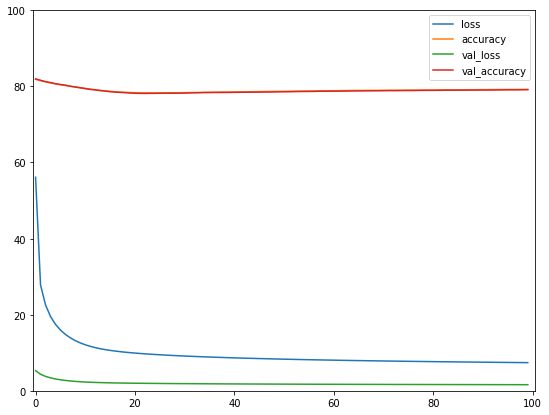

In [ ]:
weights = custom_svm(X_b, y_train, X_val, y_val)

Исходя из графика видно, что модель недообучается(но дело не в модели, а в фичах), решением данной проблемы может быть проведения более детальной работы с фичами. Или же применение технологии бустинга.

In [ ]:
np.save("custom_svm_weights.npy", weights)

In [ ]:
pred_train = np.sign(X_b.dot(weights)).flatten()
score_metrics(pred_train, y_train)

ACCURACY: 0.8236483765877228
PRECISION: 0.29411764705882354
RECALL: 0.0005192916861401049
CONFUSION MATRIX 
[[89995    24]
 [19247    10]]


In [ ]:
pred_val = np.sign(X_val.dot(weights)).flatten()
score_metrics(pred_val, y_val)

ACCURACY: 0.8245241581259151
PRECISION: 0.2
RECALL: 0.0004177109440267335
CONFUSION MATRIX 
[[22524     8]
 [ 4786     2]]


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(clean_train_data, y_train_full, test_size=0.2) # c дополнениями

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((182828, 11), (45708, 11), (182828,), (45708,))

In [ ]:
X_b = np.c_[np.ones(shape=(X_train.shape[0], 1)), X_train]
X_val = np.c_[np.ones(shape=(X_val.shape[0], 1)), X_val]

In [ ]:
y_train_log = y_train.copy()
y_train_log[y_train_log == -1] = 0
y_val_log = y_val.copy()
y_val_log[y_val_log == -1] = 0
log_weights = custom_log_reg(X_b, y_train_log)

EPOCH: 1 --- ERROR: [1.74767896]
EPOCH: 2 --- ERROR: [0.98127506]
EPOCH: 3 --- ERROR: [0.89338865]
EPOCH: 4 --- ERROR: [0.84961366]
EPOCH: 5 --- ERROR: [0.82084848]
EPOCH: 6 --- ERROR: [0.8000561]
EPOCH: 7 --- ERROR: [0.78409066]
EPOCH: 8 --- ERROR: [0.77130833]
EPOCH: 9 --- ERROR: [0.76075628]
EPOCH: 10 --- ERROR: [0.75183932]
EPOCH: 11 --- ERROR: [0.744164]
EPOCH: 12 --- ERROR: [0.73745843]
EPOCH: 13 --- ERROR: [0.73152787]
EPOCH: 14 --- ERROR: [0.72622864]
EPOCH: 15 --- ERROR: [0.72145206]
EPOCH: 16 --- ERROR: [0.71711423]
EPOCH: 17 --- ERROR: [0.71314912]
EPOCH: 18 --- ERROR: [0.70950398]
EPOCH: 19 --- ERROR: [0.70613609]
EPOCH: 20 --- ERROR: [0.7030104]
EPOCH: 21 --- ERROR: [0.70009783]
EPOCH: 22 --- ERROR: [0.69737404]
EPOCH: 23 --- ERROR: [0.69481848]
EPOCH: 24 --- ERROR: [0.69241364]
EPOCH: 25 --- ERROR: [0.69014448]
EPOCH: 26 --- ERROR: [0.68799804]
EPOCH: 27 --- ERROR: [0.68596305]
EPOCH: 28 --- ERROR: [0.68402965]
EPOCH: 29 --- ERROR: [0.6821892]
EPOCH: 30 --- ERROR: [0.6804

In [ ]:
pred_prob_train = np.round(logistic_regression(X_b.dot(log_weights))).flatten()
score_metrics(pred_prob_train, y_train_log)

ACCURACY: 0.7308070973811451
PRECISION: 0.3746324463643954
RECALL: 0.24391973339005885
CONFUSION MATRIX 
[[123292  17227]
 [ 31989  10320]]


In [ ]:
pred_prob_val = np.round(logistic_regression(X_val.dot(log_weights))).flatten()
score_metrics(pred_prob_val, y_val_log)

ACCURACY: 0.730462938654065
PRECISION: 0.37321769807437893
RECALL: 0.2396413402548372
CONFUSION MATRIX 
[[30849  4264]
 [ 8056  2539]]


Epoch: 1 --- Error: [[3.31248232]]
Epoch: 2 --- Error: [[2.45604197]]
Epoch: 3 --- Error: [[1.89640042]]
Epoch: 4 --- Error: [[1.66678573]]
Epoch: 5 --- Error: [[1.53533199]]
Epoch: 6 --- Error: [[1.4428515]]
Epoch: 7 --- Error: [[1.37212552]]
Epoch: 8 --- Error: [[1.31567316]]
Epoch: 9 --- Error: [[1.2693038]]
Epoch: 10 --- Error: [[1.23033838]]
Epoch: 11 --- Error: [[1.19706596]]
Epoch: 12 --- Error: [[1.16824641]]
Epoch: 13 --- Error: [[1.14298181]]
Epoch: 14 --- Error: [[1.12058933]]
Epoch: 15 --- Error: [[1.10058897]]
Epoch: 16 --- Error: [[1.08257801]]
Epoch: 17 --- Error: [[1.06624386]]
Epoch: 18 --- Error: [[1.05133582]]
Epoch: 19 --- Error: [[1.03768364]]
Epoch: 20 --- Error: [[1.02510438]]
Epoch: 21 --- Error: [[1.01347285]]
Epoch: 22 --- Error: [[1.00268214]]
Epoch: 23 --- Error: [[0.99262845]]
Epoch: 24 --- Error: [[0.98323276]]
Epoch: 25 --- Error: [[0.9744254]]
Epoch: 26 --- Error: [[0.9661515]]
Epoch: 27 --- Error: [[0.95836041]]
Epoch: 28 --- Error: [[0.95100003]]
Epoch

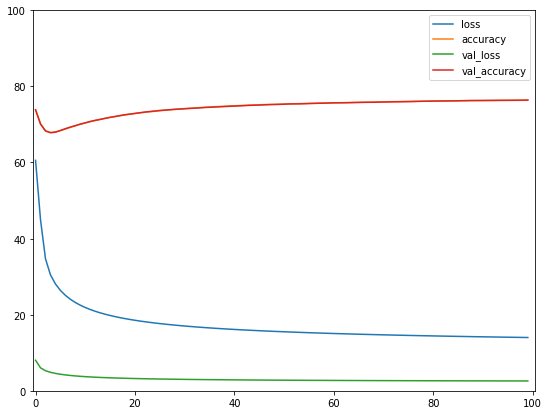

In [ ]:
weights = custom_svm(X_b, y_train, X_val, y_val)

In [ ]:
pred_train = np.sign(X_b.dot(weights)).flatten()
score_metrics(pred_train, y_train)

ACCURACY: 0.7635537226245432
PRECISION: 0.46504027967776257
RECALL: 0.14462643881916376
CONFUSION MATRIX 
[[133480   7039]
 [ 36190   6119]]


In [ ]:
pred_val = np.sign(X_val.dot(weights)).flatten()
score_metrics(pred_val, y_val)

ACCURACY: 0.7640894372976285
PRECISION: 0.47075295581829496
RECALL: 0.14280320906087776
CONFUSION MATRIX 
[[33412  1701]
 [ 9082  1513]]


In [ ]:
rnd_clf = RandomForestClassifier(300, criterion='entropy')
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300)

In [ ]:
pred_train = rnd_clf.predict(X_train)
score_metrics(pred_train, y_train)

ACCURACY: 0.9982661299144551
PRECISION: 0.9974883897260923
RECALL: 0.9950128814200289
CONFUSION MATRIX 
[[140413    106]
 [   211  42098]]


In [ ]:
pred_val = rnd_clf.predict(X_val[:,1:])
score_metrics(pred_val, y_val)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ACCURACY: 0.782532598232257
PRECISION: 0.5438244346313394
RECALL: 0.38357715903728173
CONFUSION MATRIX 
[[31704  3409]
 [ 6531  4064]]
